# **Hearth**

Mas confiable: UCI Heart Disease: https://archive.ics.uci.edu/dataset/45/heart+disease

Mayor volumen de datos: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

La mayoria de los datasets utilizables se basan en el de UCI heart disease, aun y cuando es informacion de 1988 es muy confiable debido a su seleccion selecta de caracteristicas comprimidas de 76 a solo 14, si bien solo son 303 datos la realidad es que debido a la combinacion de paises obtenidos, aunque son de Europa genera una buena brecha de uso, una recomendacion a futuro seria la captura de datos en LATAM relacionados con esto, para aumentar las metricas, pero eso considerando que el pais de origen fuera de las features seleccionadas sea algo que no se vea reflejado

# Características del Conjunto de Datos de Enfermedades Cardíacas

- **age**: Edad del paciente.
- **sex**: Sexo (1 = hombre, 0 = mujer).
- **chest pain type**: Tipo de dolor de pecho (4 valores posibles).
- **resting blood pressure**: Presión arterial en reposo (mm Hg).
- **serum cholestoral in mg/dl**: Colesterol sérico en mg/dl.
- **fasting blood sugar > 120 mg/dl**: Nivel de azúcar en sangre en ayunas > 120 mg/dl (1 = verdadero, 0 = falso).
- **resting electrocardiographic results**: Resultados del electrocardiograma en reposo (valores 0, 1, 2).
- **maximum heart rate achieved**: Frecuencia cardíaca máxima alcanzada.
- **exercise induced angina**: Angina inducida por el ejercicio (1 = sí, 0 = no).
- **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo.
- **the slope of the peak exercise ST segment**: Pendiente del segmento ST en el ejercicio máximo.
- **number of major vessels (0-3) colored by flourosopy**: Número de vasos principales (0-3) coloreados por fluoroscopía.
- **thal**:
  - 0 = normal
  - 1 = defecto fijo
  - 2 = defecto reversible


##**1. Importacion Librerias**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib

## **2.Exploración Inicial**

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoOracle/refs/heads/main/heart.csv')


In [29]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [30]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Dado que en la exploracion de los datos no vimos valores faltantes no hace falta el preprocesamiento en esa area

## **3. Preprocesamiento de Datos**

## **4. Análisis Exploratorio de Datos (EDA)**

### **Generar Histogramas para Todas las Variables**

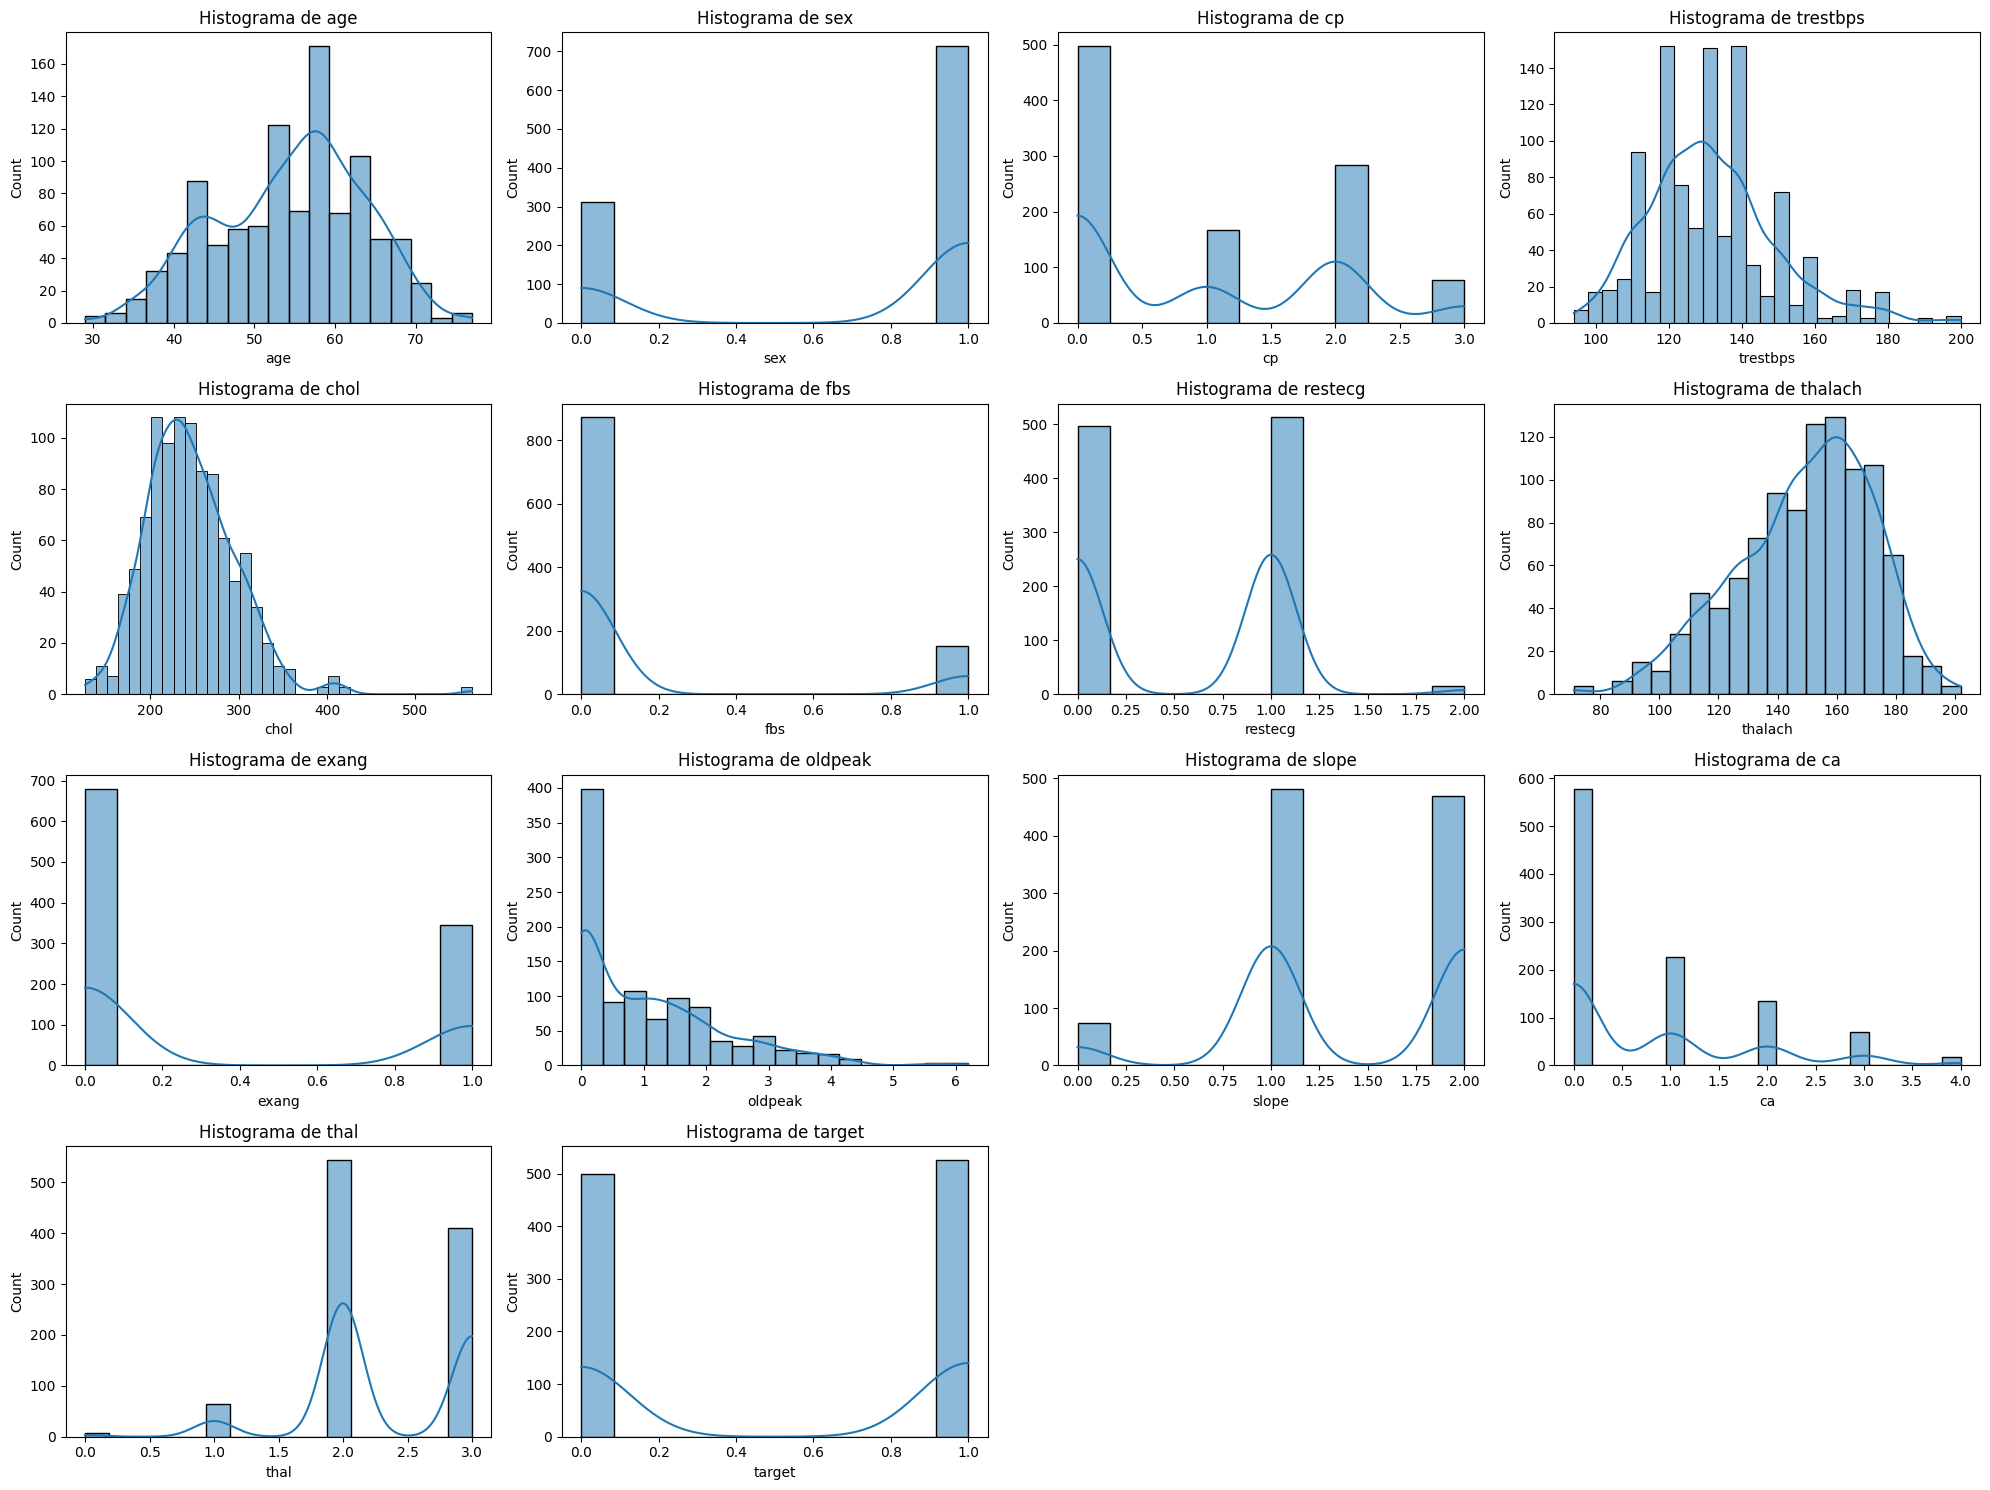

In [35]:
# Lista de todas las columnas
cols = data.columns

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Número total de variables
num_vars = len(cols)

# Calcular el número de filas y columnas para el subplot
n_cols = 4
n_rows = (num_vars + n_cols - 1) // n_cols

# Generar histogramas
for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histograma de {col}')

plt.tight_layout()
plt.show()


### **Generar Matriz de Correlación**

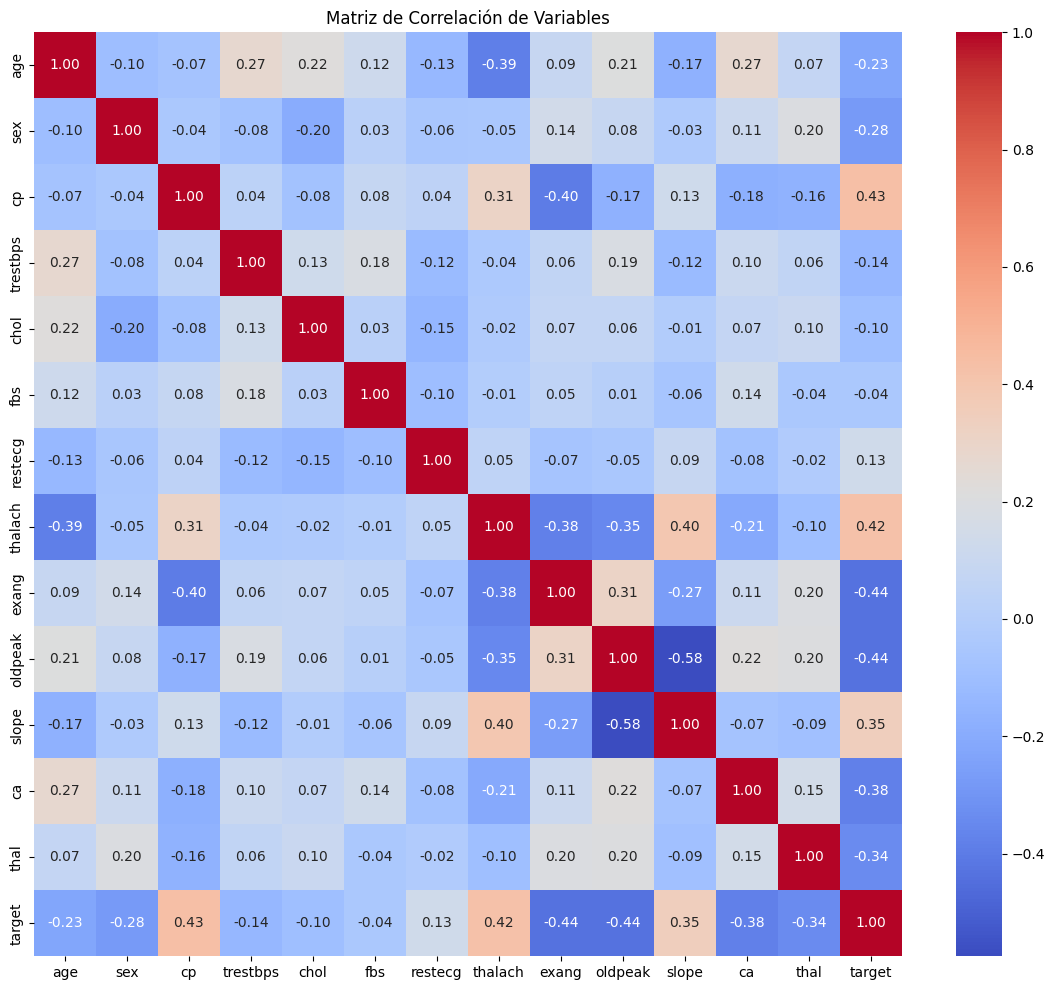

In [31]:
# Calcular la matriz de correlación
corr_matrix = data.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 12))

# Generar el mapa de calor
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Título del gráfico
plt.title('Matriz de Correlación de Variables')

# Mostrar el gráfico
plt.show()


### **Generar Pairplot (Gráfico de Pares)**

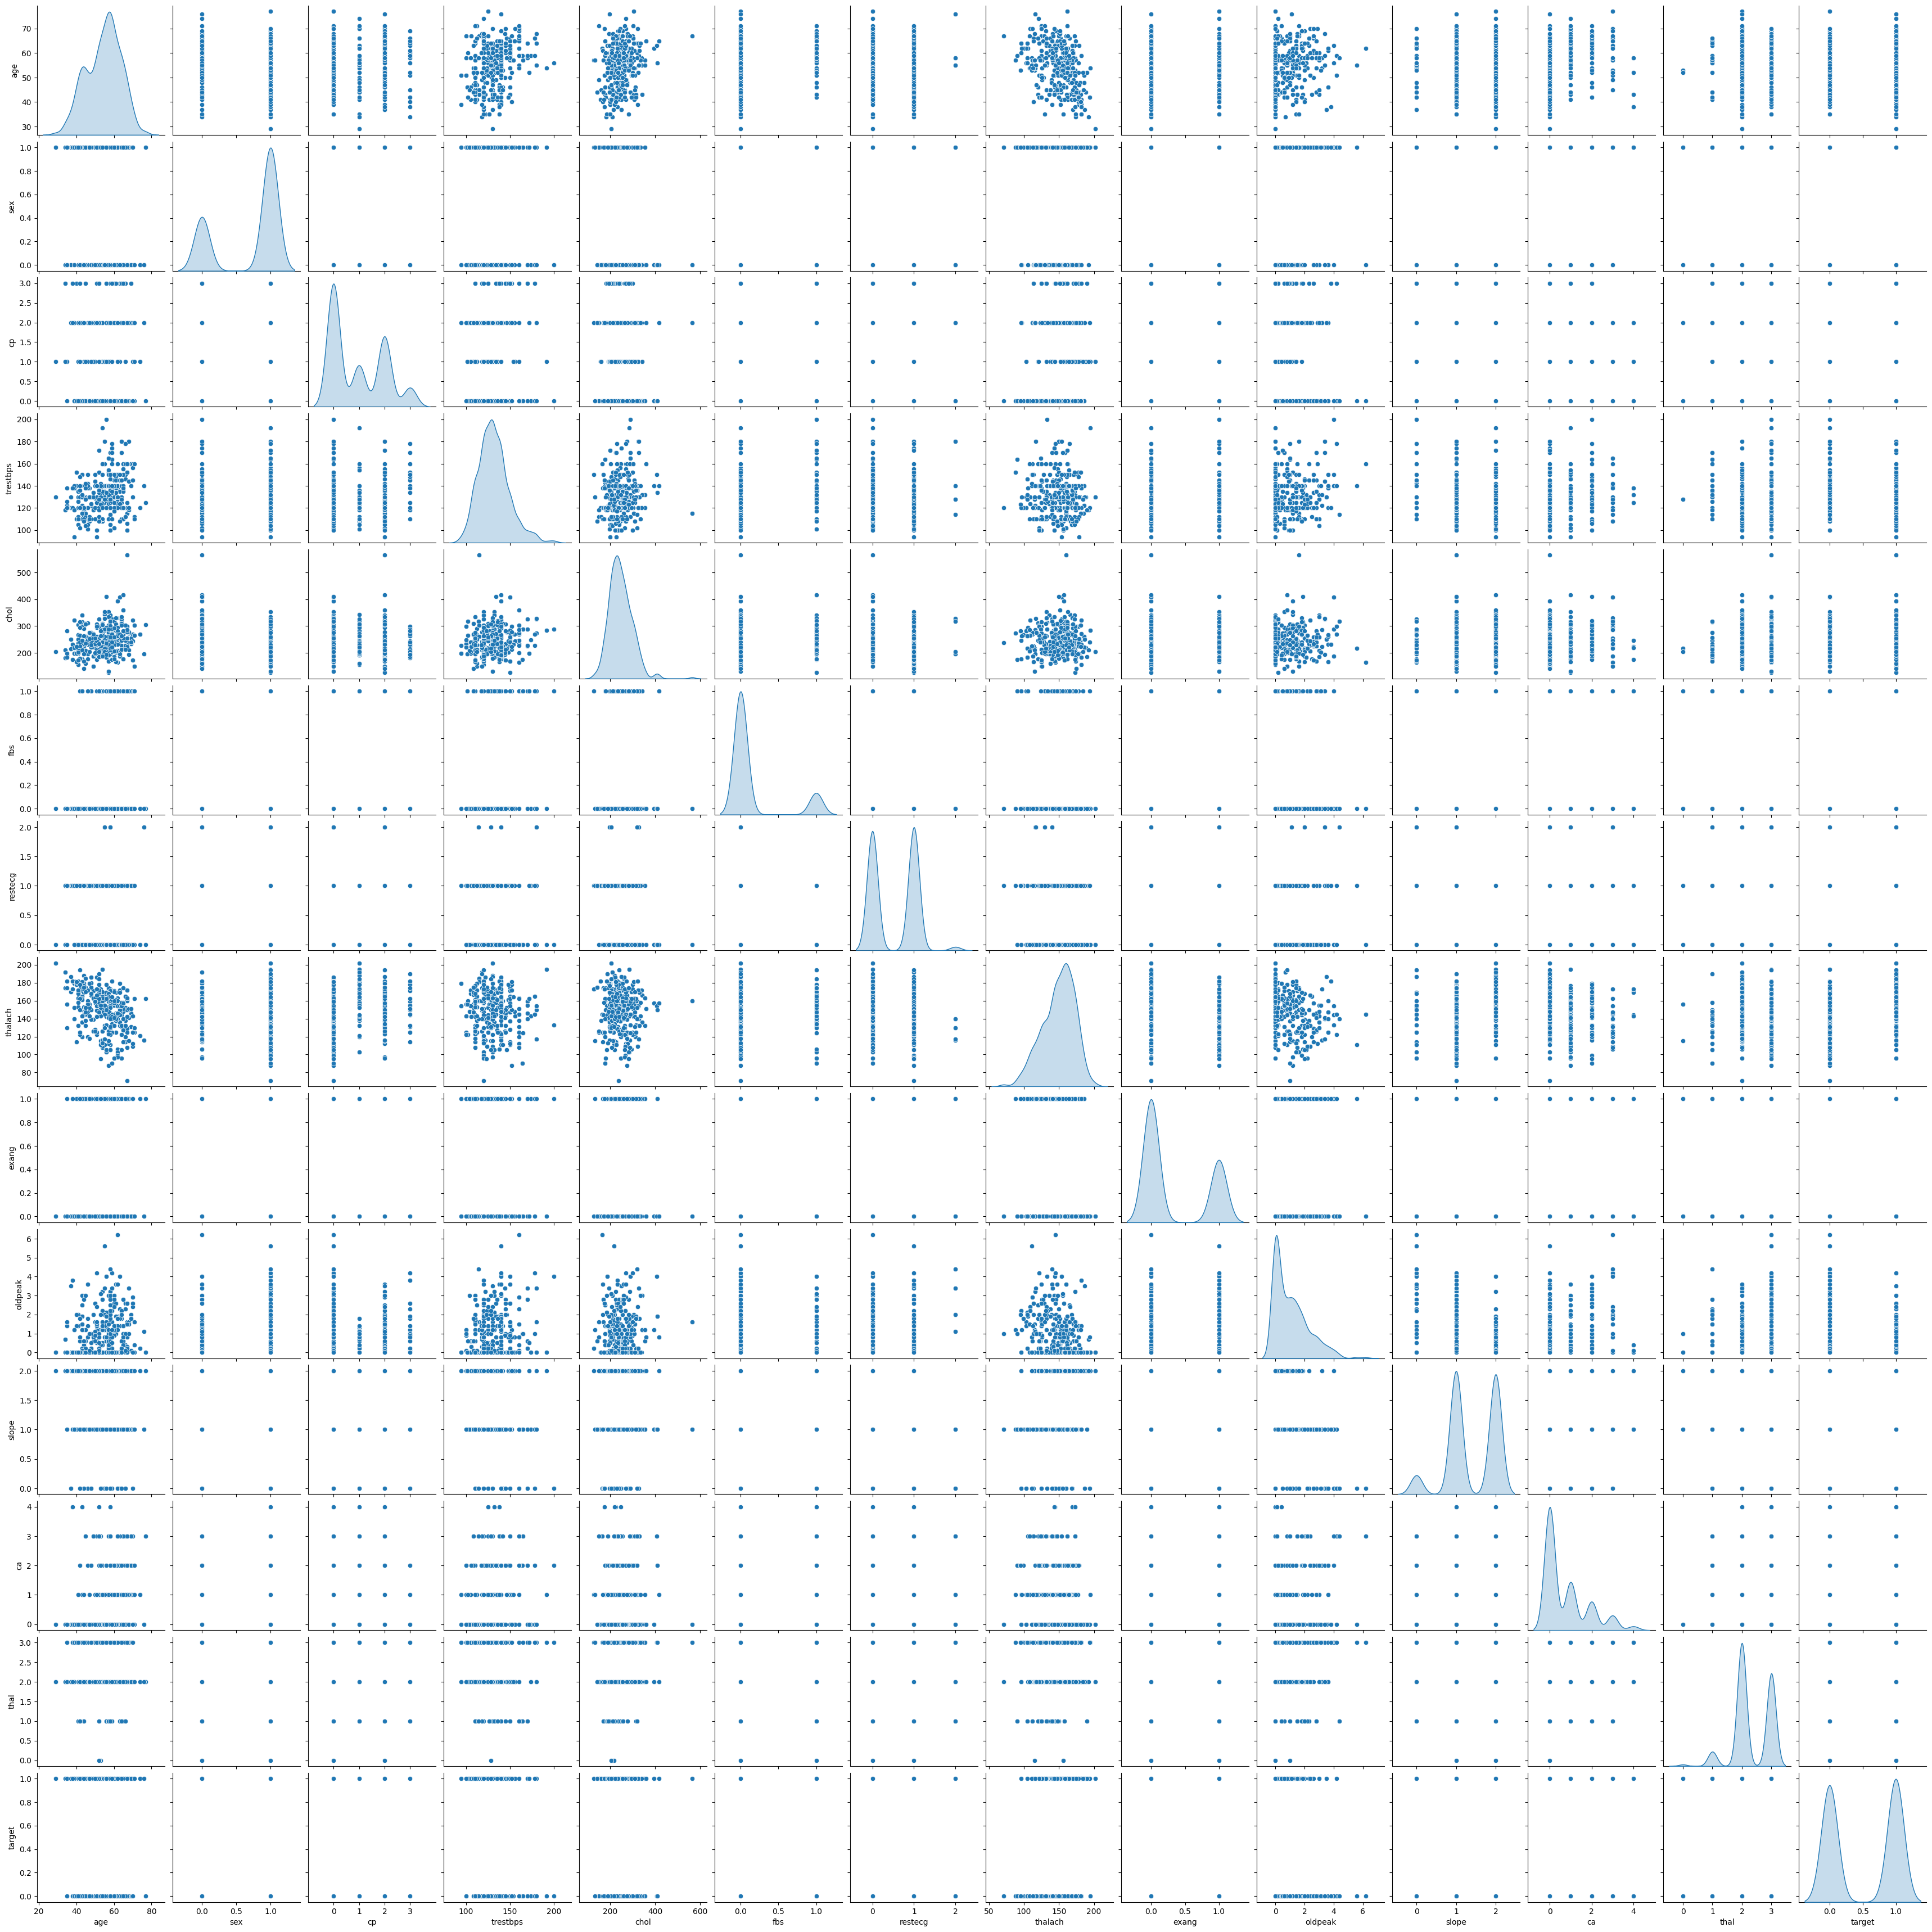

In [36]:
# Generar el pairplot
sns.pairplot(data, diag_kind='kde')

# Mostrar el gráfico
plt.show()


### **Generar Boxplots para Todas las Variables Respecto a la Variable Objetivo**

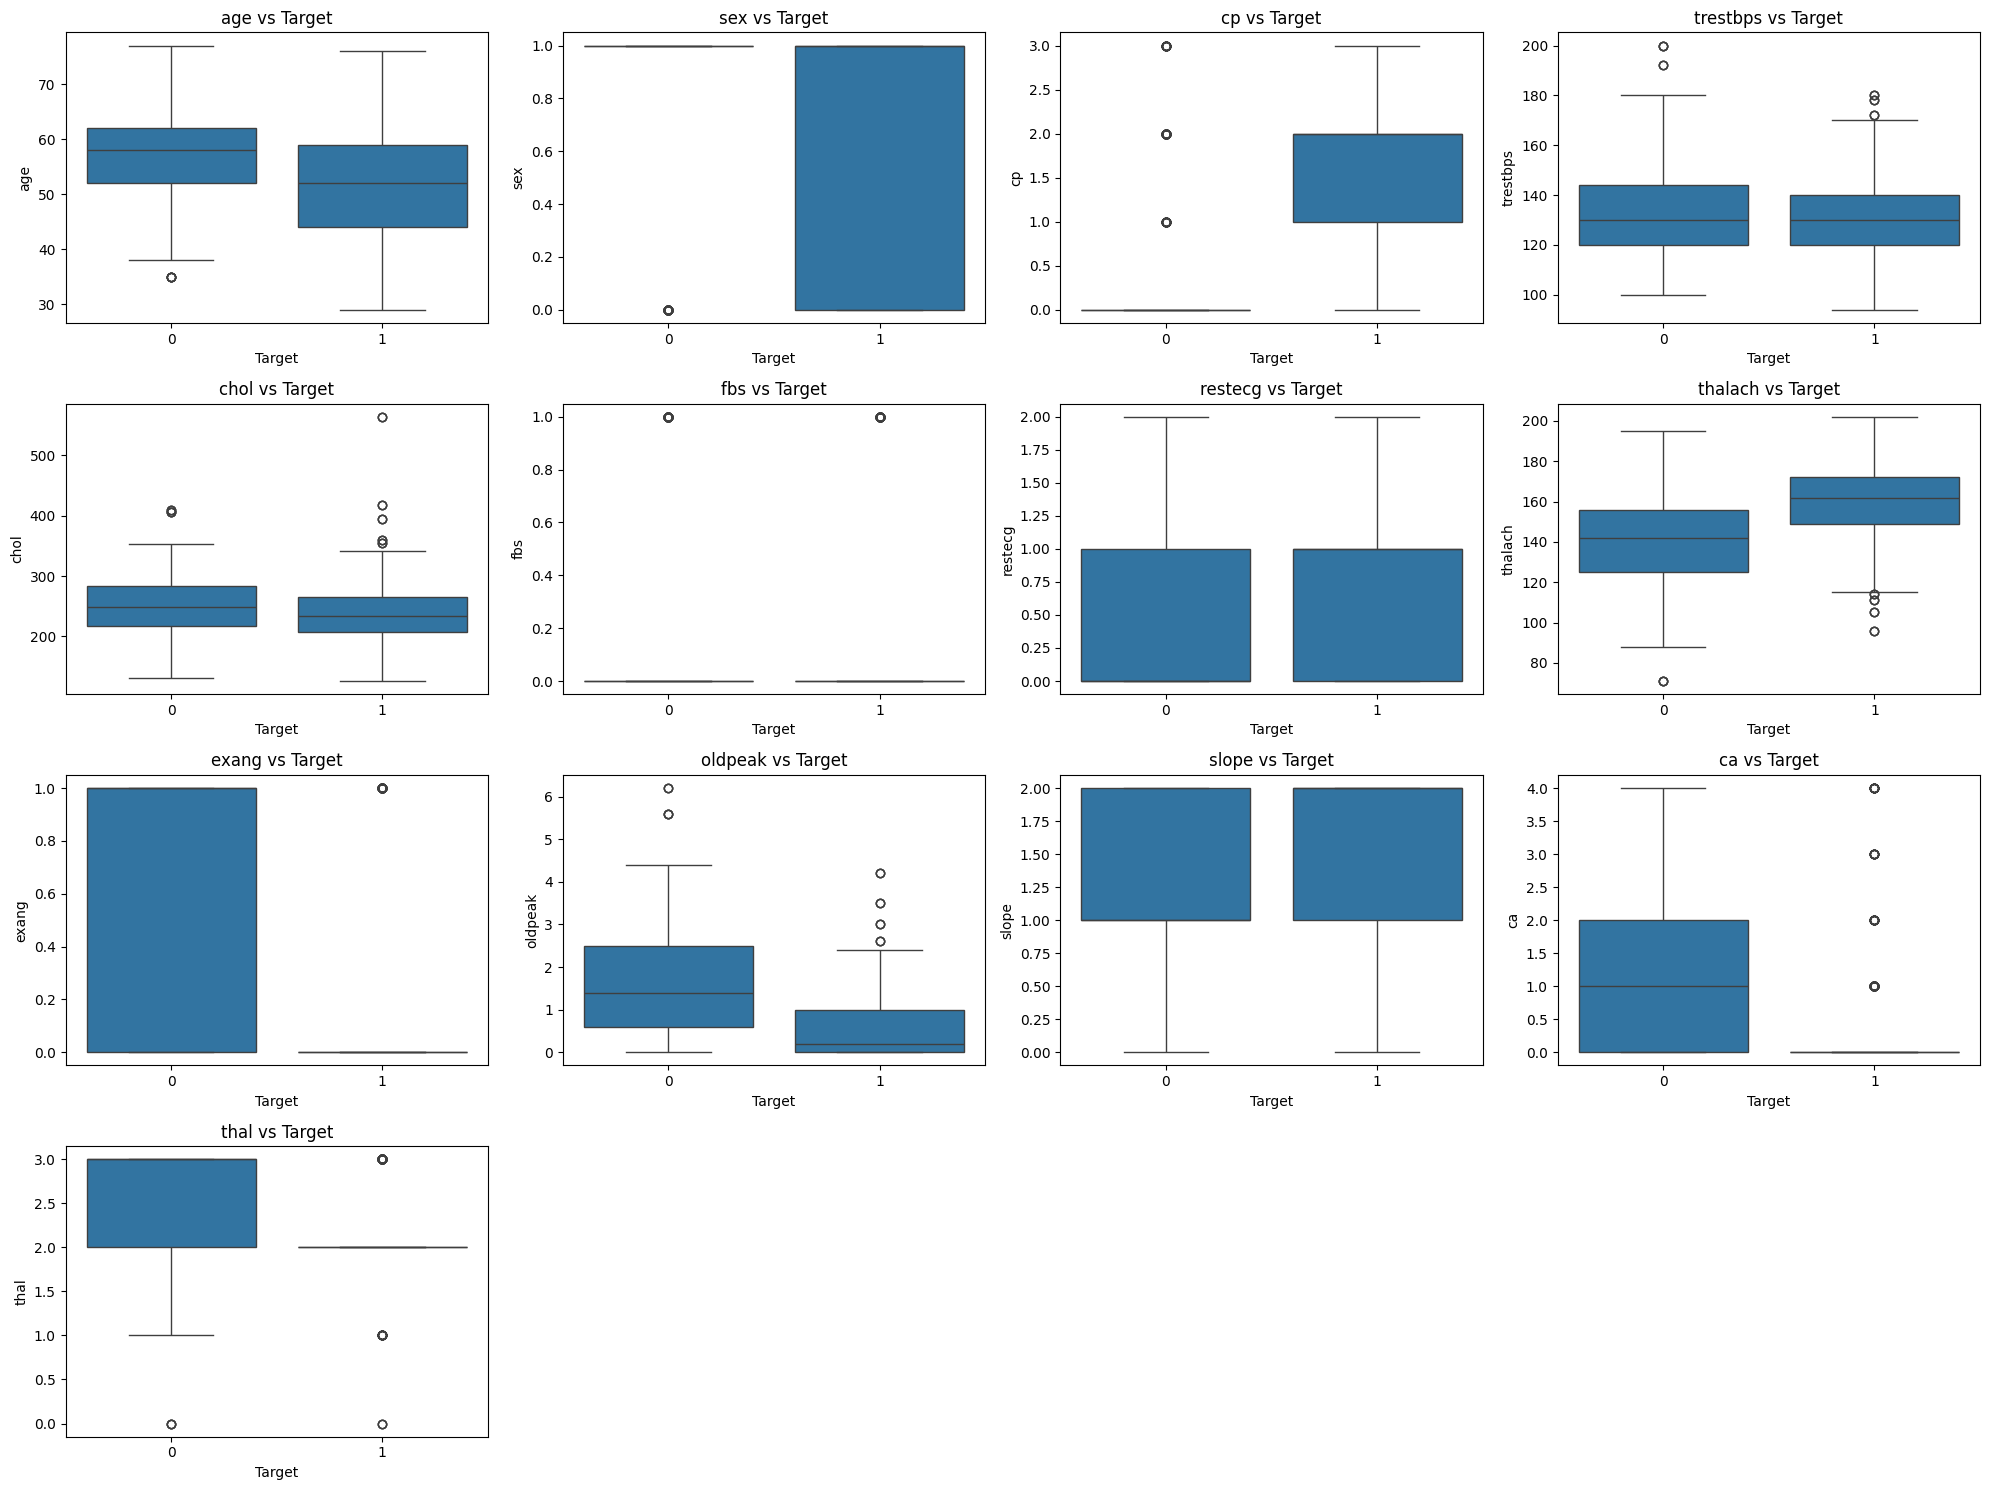

In [37]:
# Verificar si 'target' está en el DataFrame
if 'target' in data.columns:
    # Excluir la variable objetivo de las variables independientes
    independent_vars = data.columns.drop('target')

    # Configurar el tamaño de la figura
    plt.figure(figsize=(20, 15))

    # Número total de variables independientes
    num_vars = len(independent_vars)

    # Calcular el número de filas y columnas para el subplot
    n_cols = 4
    n_rows = (num_vars + n_cols - 1) // n_cols

    # Generar boxplots
    for i, col in enumerate(independent_vars):
        plt.subplot(n_rows, n_cols, i+1)
        sns.boxplot(x='target', y=col, data=data)
        plt.title(f'{col} vs Target')
        plt.xlabel('Target')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()
else:
    print("La variable 'target' no está en el DataFrame.")



### **Verificar Distribución de la Variable Objetivo**


Distribución de la variable 'target':
target
1    526
0    499
Name: count, dtype: int64


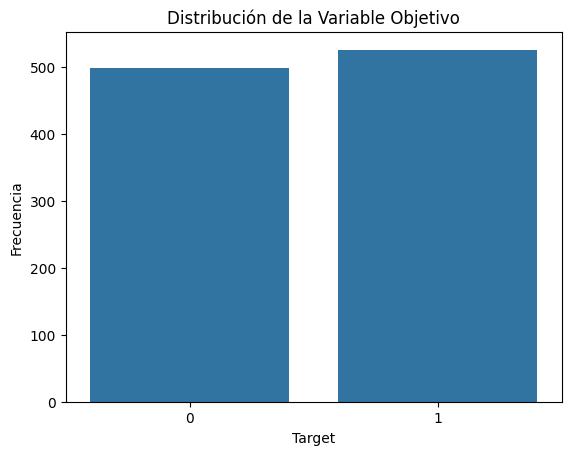

In [38]:
if 'target' in data.columns:
    # Contar los valores de la variable objetivo
    target_counts = data['target'].value_counts()
    print("\nDistribución de la variable 'target':")
    print(target_counts)

    # Generar el gráfico de barras
    sns.countplot(x='target', data=data)
    plt.title('Distribución de la Variable Objetivo')
    plt.xlabel('Target')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("La variable 'target' no está en el DataFrame.")

In [40]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
data.describe()



Estadísticas descriptivas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Detección de Valores Atípicos**

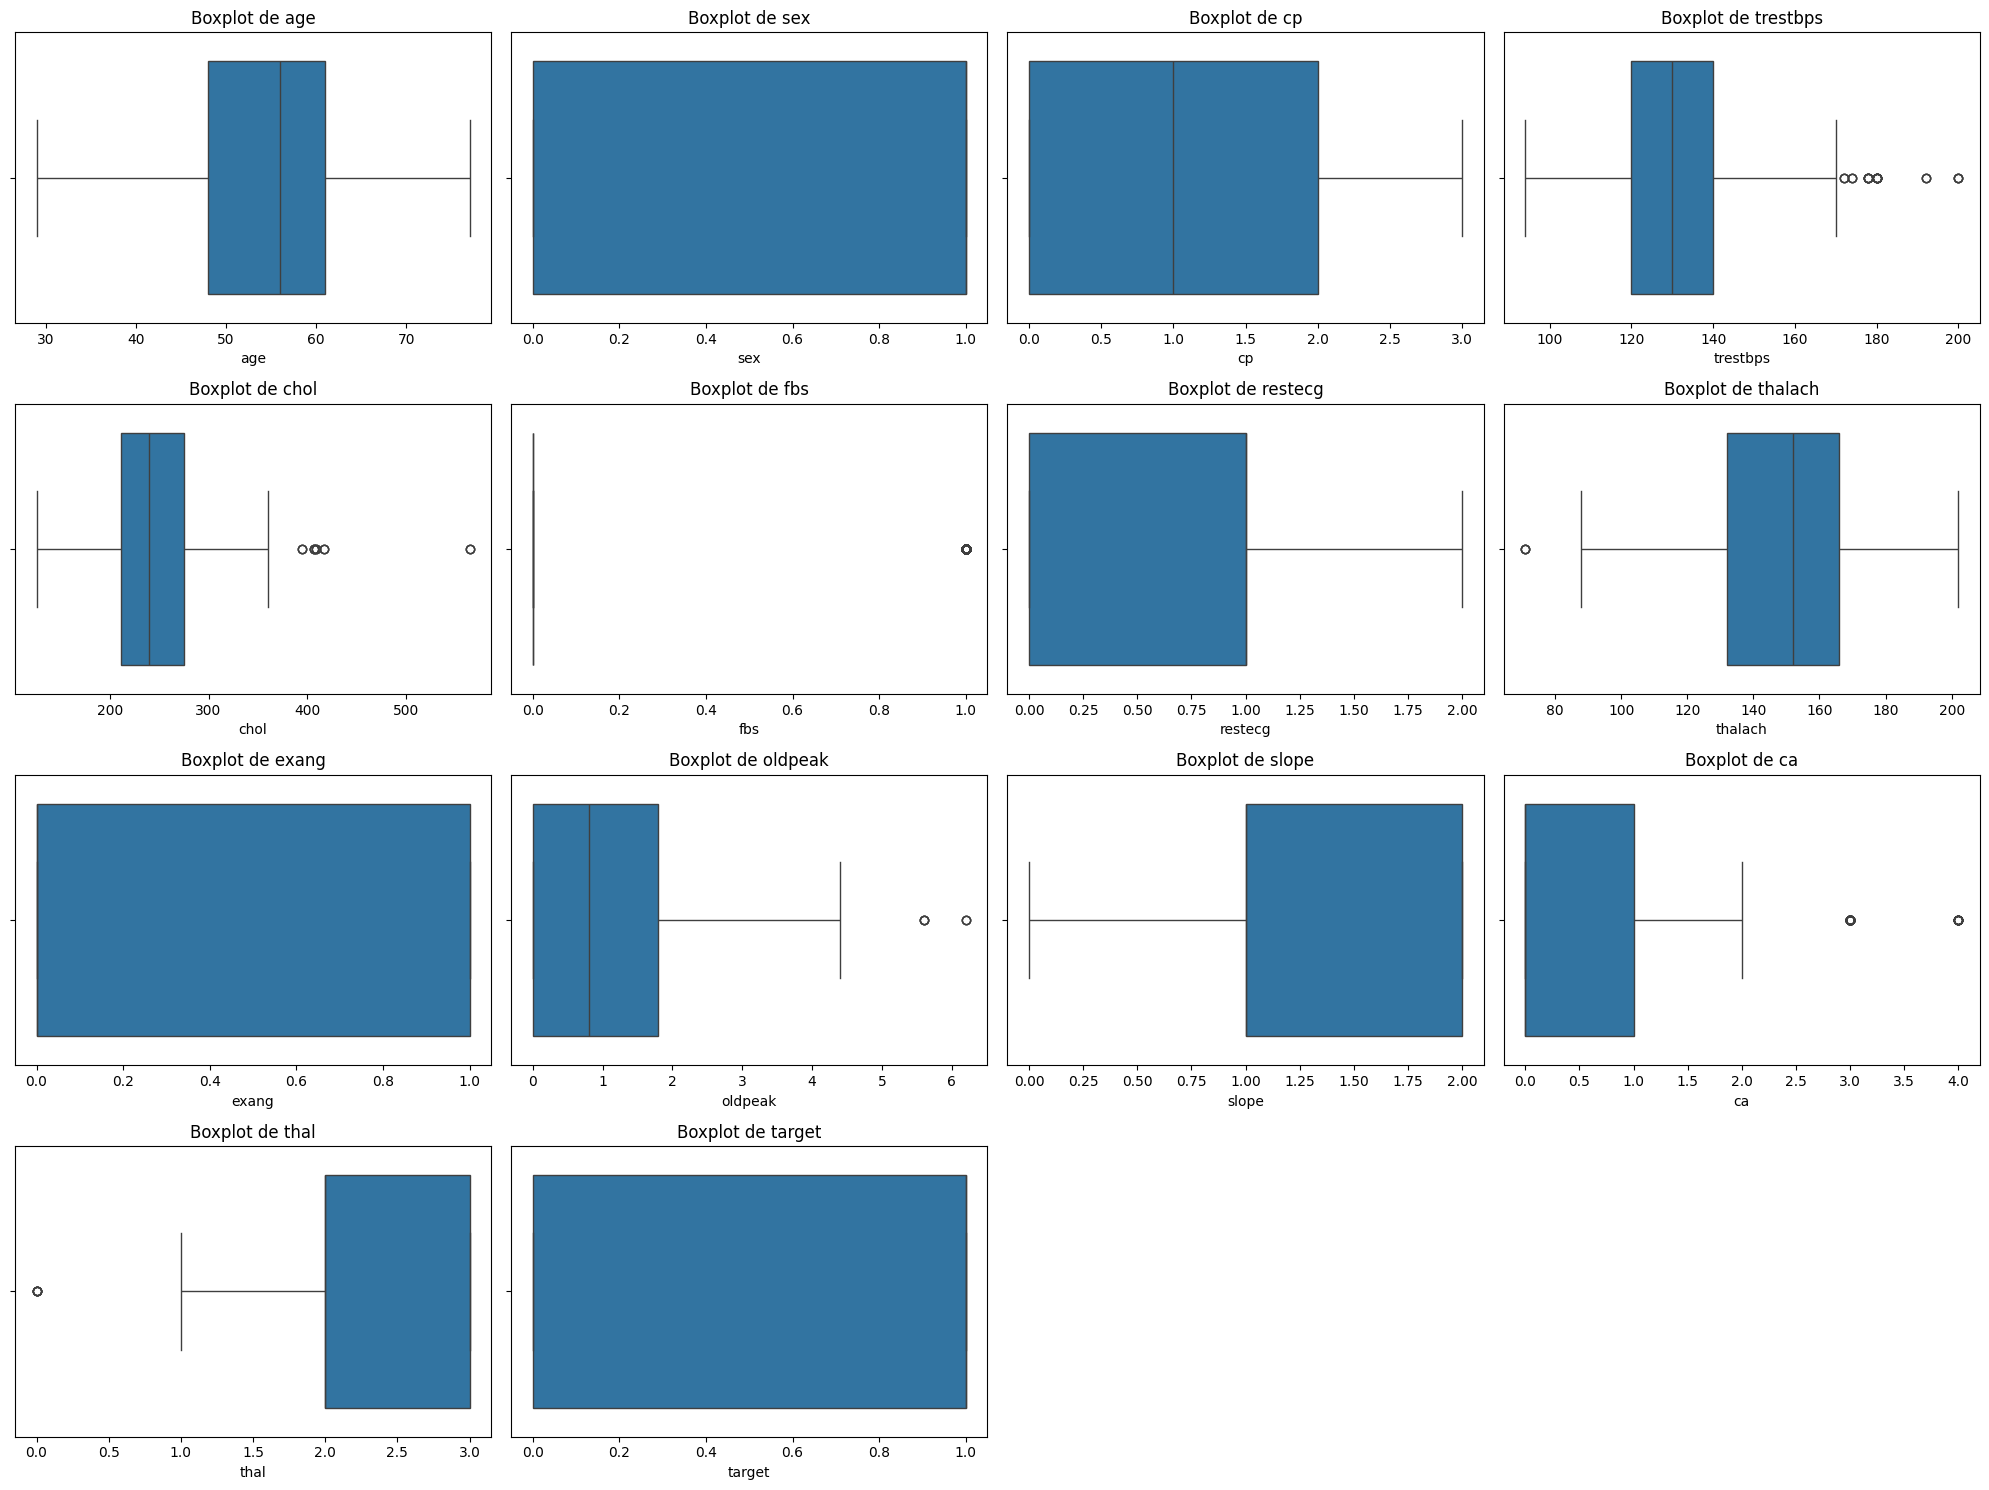

In [41]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 15))

# Generar boxplots para cada variable
for i, col in enumerate(data.columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


### **Análisis de Correlación con la Variable Objetivo**

In [42]:
if 'target' in data.columns:
    # Calcular correlación con la variable 'target'
    corr_with_target = data.corr()['target'].drop('target')

    # Ordenar las correlaciones
    corr_with_target_sorted = corr_with_target.abs().sort_values(ascending=False)

    # Mostrar las correlaciones más fuertes
    print("\nVariables más correlacionadas con 'target':")
    print(corr_with_target_sorted.head(10))
else:
    print("La variable 'target' no está en el DataFrame.")



Variables más correlacionadas con 'target':
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
Name: target, dtype: float64


### **Generar Scatter Plots para las Variables Más Importantes**

In [53]:
# Calcular la correlación de las variables con el target
corr_with_target = data.corr()['target'].drop('target').abs().sort_values(ascending=False)

# Seleccionar las 5 variables más importantes
top_vars = corr_with_target.head(5).index.tolist()
print("Variables más importantes:", top_vars)


Variables más importantes: ['oldpeak', 'exang', 'cp', 'thalach', 'ca']


In [55]:
# Configurar estilo de gráficos
sns.set(style='whitegrid', palette='deep')

# Crear una copia del DataFrame con las variables de interés y la variable objetivo 'target'
variables_interes = ['oldpeak', 'exang', 'cp', 'thalach', 'ca', 'target']
data_subset = data[variables_interes].copy()

# Verificar tipos de datos
print(data_subset.dtypes)


oldpeak    float64
exang        int64
cp           int64
thalach      int64
ca           int64
target       int64
dtype: object


In [56]:
# Convertir variables categóricas a tipo 'category'
categorical_vars = ['exang', 'cp']
for var in categorical_vars:
    data_subset[var] = data_subset[var].astype('category')


### **Mapas de densidad y sactter plots**

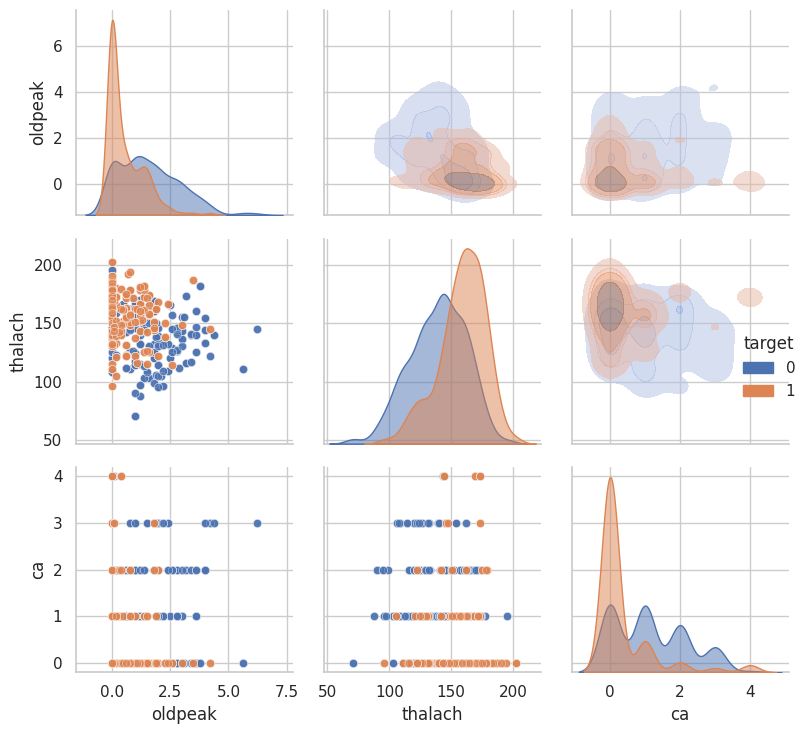

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el PairGrid
g = sns.PairGrid(data_subset, hue='target', diag_sharey=False)

# Definir funciones personalizadas para manejar variables categóricas y numéricas
def scatter_categorical(x, y, **kwargs):
    if x.dtype.name == 'category' and y.dtype.name == 'category':
        sns.countplot(x=x, hue=y, **kwargs)
    elif x.dtype.name == 'category':
        sns.stripplot(x=x, y=y, jitter=True, alpha=0.6, **kwargs)
    elif y.dtype.name == 'category':
        sns.stripplot(x=y, y=x, jitter=True, alpha=0.6, **kwargs)
    else:
        sns.scatterplot(x=x, y=y, alpha=0.6, **kwargs)

def kde_or_hist(x, **kwargs):
    if x.dtype.name == 'category':
        sns.countplot(x=x, **kwargs)
    else:
        sns.kdeplot(x=x, fill=True, alpha=0.5, **kwargs)

# Mapear los gráficos
g.map_lower(scatter_categorical)
g.map_diag(kde_or_hist)
g.map_upper(sns.kdeplot, fill=True, thresh=0.1, levels=5, alpha=0.5)

# Añadir la leyenda
g.add_legend(title='target')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## **5. Preparación del Conjunto de Datos**

In [93]:
X = data.drop('target', axis=1)  # Características
y = data['target']  # Variable objetivo


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## **6. Entrenamiento del modelo**

### **1. Logistic Regression**

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

print("Regresión Logística - Resultados")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))


Regresión Logística - Resultados
Accuracy: 0.8146341463414634

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205


Confusion Matrix:
 [[70 30]
 [ 8 97]]


### **2. Desicion Trees**

In [96]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Árbol de Decisión - Resultados")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Árbol de Decisión - Resultados
Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
 [[100   0]
 [  3 102]]


### **3. Random Forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

print("Random Forest - Resultados")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_forest))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))


Random Forest - Resultados
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
 [[100   0]
 [  0 105]]


### **4. Redes Neuronales (MLPClassifier)**

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Crear y entrenar el modelo de Redes Neuronales
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_mlp = mlp_model.predict(X_test)

# Métricas de evaluación
print("Redes Neuronales - Resultados")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Redes Neuronales - Resultados
Accuracy: 0.7902439024390244

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81       100
           1       0.89      0.68      0.77       105

    accuracy                           0.79       205
   macro avg       0.81      0.79      0.79       205
weighted avg       0.81      0.79      0.79       205


Confusion Matrix:
 [[91  9]
 [34 71]]


### **5. Support Vector Machine (SVM)**

In [99]:
from sklearn.svm import SVC

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Métricas de evaluación
print("SVM - Resultados")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM - Resultados
Accuracy: 0.7170731707317073

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       100
           1       0.70      0.79      0.74       105

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.71       205
weighted avg       0.72      0.72      0.72       205


Confusion Matrix:
 [[64 36]
 [22 83]]


### **6. XGBoost**

In [100]:
from xgboost import XGBClassifier

# Crear y entrenar el modelo XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Métricas de evaluación
print("XGBoost - Resultados")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost - Resultados
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
 [[100   0]
 [  0 105]]


<ipython-input-103-f72aa243b116>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


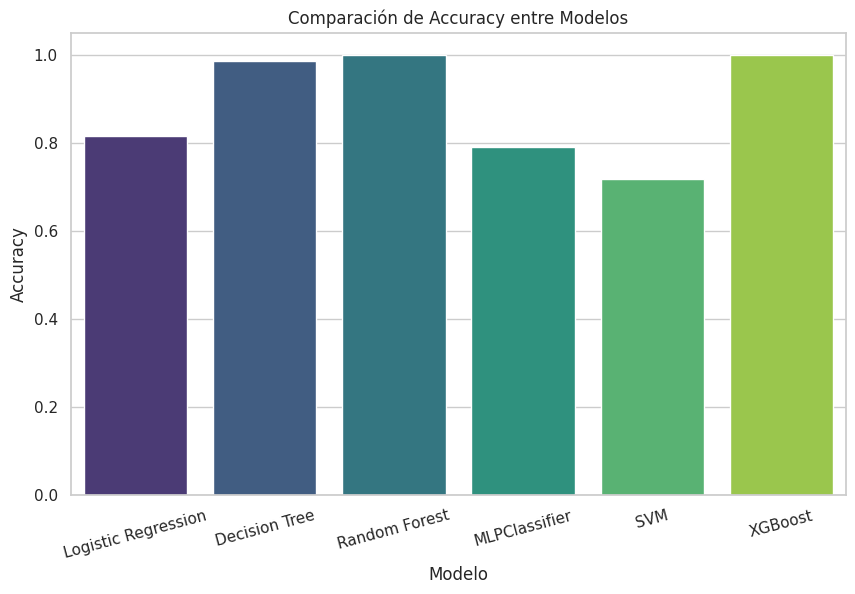

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'MLPClassifier', 'SVM', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest),
    accuracy_score(y_test, y_pred_mlp),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgb)
]

# Gráfico comparativo
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.xticks(rotation=15)
plt.show()

Dado que el modelo de Random Forest, XGboost y Desicion Tree estan aprendiendo demasiado bien los modelos podriamos pensar que es bueno, sin embargo, un entrenamiento asi de bueno sugiere que puedan estar aprendiendo etiquetas dado que es un modelo supervisado, trataremos de hacer el modelo semi-supervisado, diviendo una parte del dataset 70% en entrenamiento y prueba para que el modelo pueda evlauarse, y el otro 30% sera escogido de datos no vistos para observar su desempeno

## **Propuesta modelo semisupervisado para un enfoque mas realista**

In [66]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto en 70% (entrenamiento + prueba) y 30% (evaluación final)
X_temp, X_eval, y_temp, y_eval = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Luego dividimos el 70% restante en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)
print("Tamaño del conjunto de evaluación final:", X_eval.shape)


Tamaño del conjunto de entrenamiento: (573, 13)
Tamaño del conjunto de validación: (144, 13)
Tamaño del conjunto de evaluación final: (308, 13)


### **Random Forest**

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entrenar el modelo en el conjunto de entrenamiento
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Validación en el conjunto de prueba interno
y_pred_test = rf_model.predict(X_test)
print("Resultados en el conjunto de validación:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Resultados en el conjunto de validación:
Accuracy: 0.9652777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        70
           1       0.97      0.96      0.97        74

    accuracy                           0.97       144
   macro avg       0.97      0.97      0.97       144
weighted avg       0.97      0.97      0.97       144



In [68]:
# Evaluar en el conjunto de evaluación independiente
y_pred_eval = rf_model.predict(X_eval)
print("Resultados en el conjunto de evaluación final:")
print("Accuracy:", accuracy_score(y_eval, y_pred_eval))
print("\nClassification Report:\n", classification_report(y_eval, y_pred_eval))


Resultados en el conjunto de evaluación final:
Accuracy: 0.9675324675324676

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       150
           1       0.97      0.96      0.97       158

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



#### **Busqueda de Hiperametros eficiente con Optuna**

In [73]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


In [74]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Crear el modelo con los hiperparámetros sugeridos
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Entrenar y validar el modelo
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Crear y ejecutar el estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


[I 2024-11-10 10:34:52,352] A new study created in memory with name: no-name-3a4deda2-1c1f-482b-8042-2265c345326b
[I 2024-11-10 10:34:53,202] Trial 0 finished with value: 0.8958333333333334 and parameters: {'n_estimators': 226, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8958333333333334.
[I 2024-11-10 10:34:53,758] Trial 1 finished with value: 0.8888888888888888 and parameters: {'n_estimators': 56, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8958333333333334.
[I 2024-11-10 10:34:56,005] Trial 2 finished with value: 0.9652777777777778 and parameters: {'n_estimators': 138, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.9652777777777778.
[I 2024-11-10 10:34:56,721] Trial 3 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 64, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 2 with value:

Best hyperparameters: {'n_estimators': 138, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [75]:
# Mostrar los mejores hiperparámetros encontrados
print("Best hyperparameters:", study.best_params)


Best hyperparameters: {'n_estimators': 138, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1}


### **Optimización de Hiperparámetros con GridSearchCV**

In [77]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instanciar el modelo y realizar GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Best hyperparameters (GridSearch):", grid_search.best_params_)

# Evaluar el modelo optimizado
best_rf_model = grid_search.best_estimator_
y_pred_grid_eval = best_rf_model.predict(X_eval)
print("Accuracy en evaluación final:", accuracy_score(y_eval, y_pred_grid_eval))


Best hyperparameters (GridSearch): {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy en evaluación final: 0.9675324675324676


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Función para calcular y mostrar las métricas de un modelo
def evaluar_modelo(modelo, X_eval, y_eval, nombre_modelo):
    y_pred = modelo.predict(X_eval)

    print(f"Resultados del {nombre_modelo}:")
    print("Accuracy:", accuracy_score(y_eval, y_pred))
    print("Precision:", precision_score(y_eval, y_pred))
    print("Recall:", recall_score(y_eval, y_pred))
    print("F1-Score:", f1_score(y_eval, y_pred))
    print("\nClassification Report:\n", classification_report(y_eval, y_pred))
    return {
        'Modelo': nombre_modelo,
        'Accuracy': accuracy_score(y_eval, y_pred),
        'Precision': precision_score(y_eval, y_pred),
        'Recall': recall_score(y_eval, y_pred),
        'F1-Score': f1_score(y_eval, y_pred)
    }


In [79]:
# 1. Modelo Original (Random Forest sin optimización)
metrics_original = evaluar_modelo(rf_model, X_eval, y_eval, "Modelo Original")

# 2. Modelo Optimizado con Optuna
best_rf_optuna = RandomForestClassifier(**study.best_params, random_state=42)
best_rf_optuna.fit(X_train, y_train)
metrics_optuna = evaluar_modelo(best_rf_optuna, X_eval, y_eval, "Modelo Optimizado con Optuna")

# 3. Modelo Optimizado con GridSearch
metrics_gridsearch = evaluar_modelo(best_rf_model, X_eval, y_eval, "Modelo Optimizado con GridSearch")

# Comparar todas las métricas en un DataFrame
import pandas as pd

metricas_comparacion = pd.DataFrame([metrics_original, metrics_optuna, metrics_gridsearch])
print(metricas_comparacion)


Resultados del Modelo Original:
Accuracy: 0.9675324675324676
Precision: 0.9743589743589743
Recall: 0.9620253164556962
F1-Score: 0.9681528662420382

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       150
           1       0.97      0.96      0.97       158

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

Resultados del Modelo Optimizado con Optuna:
Accuracy: 0.9675324675324676
Precision: 0.9743589743589743
Recall: 0.9620253164556962
F1-Score: 0.9681528662420382

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       150
           1       0.97      0.96      0.97       158

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97 

1. Misma Búsqueda de Hiperparámetros
Tanto Optuna como GridSearchCV pueden llegar a la misma combinación de hiperparámetros óptimos si:

Las configuraciones de hiperparámetros explorados son similares o coinciden.
La función objetivo es la misma y está bien definida.
Ambos métodos encontraron los mismos parámetros como óptimos para maximizar la métrica (accuracy en este caso).
En este caso, ambas técnicas llegaron a los mismos hiperparámetros óptimos, lo que genera los mismos resultados en métricas como Accuracy, Precision, Recall, y F1-Score.

In [81]:
import pandas as pd

# Crear un DataFrame para mostrar las predicciones vs las etiquetas reales
results = pd.DataFrame({
    'Predicciones': y_pred_grid_eval,
    'Reales': y_eval.values
})

# Mostrar una muestra de las predicciones
results.head(20)


,Predicciones,Reales
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,0
7,1,1
8,0,0
9,1,1


## **Probabilidades**

# Cálculo de Probabilidades por Modelo

# Cálculo de Probabilidades por Modelo

```python
### 1. Logistic Regression
# La Regresión Logística utiliza la función sigmoide para calcular las probabilidades:
# Fórmula:
# P(clase = 1 | X) = 1 / (1 + exp(-z))
# Donde z = β0 + β1*x1 + β2*x2 + ... + βn*xn
proba_logistic = logistic_model.predict_proba(X_eval)[:, 1]

### 2. Random Forest
# En Random Forest, la probabilidad se calcula como la proporción de árboles que predicen la clase 1:
# Fórmula:
# P(clase = 1 | X) = (Número de árboles que predicen la clase 1) / (Total de árboles)
proba_rf = best_rf_model.predict_proba(X_eval)[:, 1]

### 3. SVM (Support Vector Machine)
# SVM utiliza Platt Scaling para estimar probabilidades cuando se habilita probability=True:
# Platt Scaling ajusta un modelo logístico a las salidas del SVM para obtener probabilidades:
# Fórmula:
# P(clase = 1 | X) = 1 / (1 + exp(-A * decision_function(X) + B))
proba_svm = svm_model.predict_proba(X_eval)[:, 1]

### 4. XGBoost
# XGBoost convierte las puntuaciones log-odds en probabilidades utilizando una función sigmoide:
# Fórmula:
# P(clase = 1 | X) = 1 / (1 + exp(-log_odds))
proba_xgb = xgb_model.predict_proba(X_eval)[:, 1]

### 5. MLPClassifier (Redes Neuronales)
# MLPClassifier utiliza una capa softmax para calcular las probabilidades de cada clase:
# Fórmula para la clase k:
# P(clase = k | X) = exp(z_k) / Σ(exp(z_j)) para todas las clases j
proba_mlp = mlp_model.predict_proba(X_eval)[:, 1]


In [104]:
# Logística: Probabilidad de pertenecer a la clase 1
proba_logistic = logistic_model.predict_proba(X_eval)[:, 1]  # Probabilidad para la clase 1

# Random Forest: Probabilidad de pertenecer a la clase 1
proba_rf = best_rf_model.predict_proba(X_eval)[:, 1]  # Probabilidad para la clase 1

# SVM: Probabilidad de pertenecer a la clase 1
proba_svm = svm_model.predict_proba(X_eval)[:, 1]  # Probabilidad para la clase 1

# XGBoost: Probabilidad de pertenecer a la clase 1
proba_xgb = xgb_model.predict_proba(X_eval)[:, 1]  # Probabilidad para la clase 1

# MLPClassifier (Neural Networks): Probabilidad de pertenecer a la clase 1
proba_mlp = mlp_model.predict_proba(X_eval)[:, 1]  # Probabilidad para la clase 1


   Real  Logistic Regression  Random Forest       SVM   XGBoost  MLPClassifier
0     0             0.629926           0.08  0.813560  0.066184       0.447703
1     0             0.007848           0.20  0.453682  0.006128       0.034927
2     1             0.908388           0.97  0.578938  0.976497       0.577041
3     1             0.840378           0.97  0.894953  0.992595       0.776573
4     1             0.979126           0.98  0.590069  0.996233       0.774173
5     1             0.959064           0.96  0.629118  0.996286       0.602185
6     0             0.587940           0.69  0.662833  0.072979       0.512780
7     1             0.974537           0.80  0.115369  0.979232       0.714359
8     0             0.868672           0.25  0.148557  0.075279       0.527675
9     1             0.911473           0.96  0.631690  0.996573       0.563517


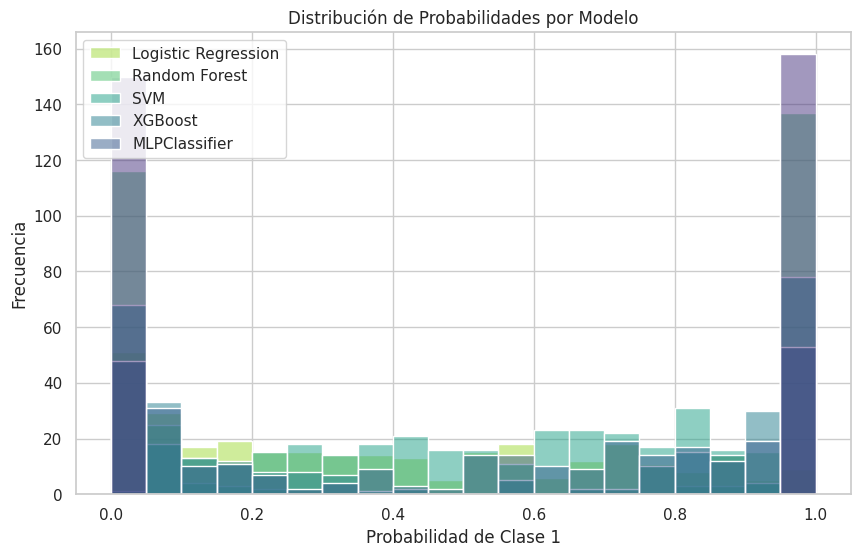

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame con probabilidades y valores reales
probabilities_df = pd.DataFrame({
    'Real': y_eval.values,
    'Logistic Regression': proba_logistic,
    'Random Forest': proba_rf,
    'SVM': proba_svm,
    'XGBoost': proba_xgb,
    'MLPClassifier': proba_mlp
})

# Visualizar las primeras filas
print(probabilities_df.head(10))

# Graficar las probabilidades para cada modelo
plt.figure(figsize=(10, 6))
sns.histplot(probabilities_df, kde=False, palette='viridis', bins=20)
plt.title("Distribución de Probabilidades por Modelo")
plt.xlabel("Probabilidad de Clase 1")
plt.ylabel("Frecuencia")
plt.legend(loc='upper left', labels=probabilities_df.columns[1:])
plt.show()


In [108]:
# Supongamos que ya tienes un modelo entrenado llamado 'best_rf_model' de Random Forest

# Lista de características esperadas por el modelo
caracteristicas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                   'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Descripciones y restricciones de las características
descripciones = {
    'age': {'desc': 'Edad del paciente en años (por ejemplo, 45)', 'tipo': 'num', 'min': 0, 'max': 120},
    'sex': {'desc': 'Sexo (1 = hombre, 0 = mujer)', 'tipo': 'cat', 'valores': [0, 1]},
    'cp': {'desc': 'Tipo de dolor de pecho (0: asintomático, 1: angina típica, 2: angina atípica, 3: dolor no anginoso)', 'tipo': 'cat', 'valores': [0, 1, 2, 3]},
    'trestbps': {'desc': 'Presión arterial en reposo en mm Hg (por ejemplo, 120)', 'tipo': 'num', 'min': 50, 'max': 250},
    'chol': {'desc': 'Colesterol sérico en mg/dl (por ejemplo, 200)', 'tipo': 'num', 'min': 100, 'max': 600},
    'fbs': {'desc': 'Azúcar en sangre en ayunas > 120 mg/dl (1 = verdadero, 0 = falso)', 'tipo': 'cat', 'valores': [0, 1]},
    'restecg': {'desc': 'Resultados del electrocardiograma en reposo (0: normal, 1: ST-T anormal, 2: hipertrofia ventricular)', 'tipo': 'cat', 'valores': [0, 1, 2]},
    'thalach': {'desc': 'Frecuencia cardíaca máxima alcanzada (por ejemplo, 150)', 'tipo': 'num', 'min': 60, 'max': 220},
    'exang': {'desc': 'Angina inducida por ejercicio (1 = sí, 0 = no)', 'tipo': 'cat', 'valores': [0, 1]},
    'oldpeak': {'desc': 'Depresión ST inducida por ejercicio en relación con el reposo (por ejemplo, 2.3)', 'tipo': 'num', 'min': 0, 'max': 10},
    'slope': {'desc': 'Pendiente del segmento ST en el ejercicio pico (0: descendente, 1: plano, 2: ascendente)', 'tipo': 'cat', 'valores': [0, 1, 2]},
    'ca': {'desc': 'Número de vasos principales coloreados por fluoroscopía (0-3)', 'tipo': 'cat', 'valores': [0, 1, 2, 3]},
    'thal': {'desc': 'Thalassemia (1: normal, 2: defecto fijo, 3: defecto reversible)', 'tipo': 'cat', 'valores': [1, 2, 3]}
}

# Diccionario para almacenar los valores de las características
valores = {}

# Función para validar las entradas
def pedir_valor(columna):
    while True:
        try:
            valor = float(input(f"{descripciones[columna]['desc']}: "))

            if descripciones[columna]['tipo'] == 'num':
                if descripciones[columna]['min'] <= valor <= descripciones[columna]['max']:
                    return valor
                else:
                    print(f"Error: {columna} debe estar entre {descripciones[columna]['min']} y {descripciones[columna]['max']}.")

            elif descripciones[columna]['tipo'] == 'cat':
                if valor in descripciones[columna]['valores']:
                    return valor
                else:
                    print(f"Error: {columna} debe ser uno de los siguientes valores: {descripciones[columna]['valores']}.")

        except ValueError:
            print("Error: Por favor, ingresa un valor numérico válido.")

# Solicitar valores al usuario para cada característica con validación
for columna in caracteristicas:
    valores[columna] = pedir_valor(columna)

# Convertir el diccionario en un DataFrame con un solo registro
import pandas as pd

data_input = pd.DataFrame([valores])

# Realizar la predicción con el modelo entrenado
prediccion = best_rf_model.predict(data_input)
probabilidad = best_rf_model.predict_proba(data_input)[:, 1]

# Mostrar los resultados
print(f"\nClasificación Predicha: {prediccion[0]}")
print(f"Probabilidad de pertenecer a la clase 1: {probabilidad[0]:.4f}")



Edad del paciente en años (por ejemplo, 45): sas
Error: Por favor, ingresa un valor numérico válido.
Edad del paciente en años (por ejemplo, 45): 1110
Error: age debe estar entre 0 y 120.
Edad del paciente en años (por ejemplo, 45): 20
Sexo (1 = hombre, 0 = mujer): 2
Error: sex debe ser uno de los siguientes valores: [0, 1].
Sexo (1 = hombre, 0 = mujer): 1
Tipo de dolor de pecho (0: asintomático, 1: angina típica, 2: angina atípica, 3: dolor no anginoso): 5
Error: cp debe ser uno de los siguientes valores: [0, 1, 2, 3].
Tipo de dolor de pecho (0: asintomático, 1: angina típica, 2: angina atípica, 3: dolor no anginoso): 3
Presión arterial en reposo en mm Hg (por ejemplo, 120): 500
Error: trestbps debe estar entre 50 y 250.
Presión arterial en reposo en mm Hg (por ejemplo, 120): 200
Colesterol sérico en mg/dl (por ejemplo, 200): 7000
Error: chol debe estar entre 100 y 600.
Colesterol sérico en mg/dl (por ejemplo, 200): 700
Error: chol debe estar entre 100 y 600.
Colesterol sérico en mg/d

In [110]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.9 MB/s eta 0:00:00


In [111]:
import streamlit as st
import pandas as pd
import joblib

# Cargar el modelo entrenado
best_rf_model = joblib.load('best_rf_model.pkl')  # Asegúrate de tener el modelo guardado como .pkl

# Título de la aplicación
st.title("Predicción de Enfermedades Cardíacas")

# Formular preguntas al usuario con validación de entradas
st.header("Por favor, responde las siguientes preguntas:")

# 1. Edad
age = st.number_input("¿Cuál es tu edad?", min_value=18, max_value=100, step=1)

# 2. Sexo
sex = st.radio("¿Cuál es tu sexo?", options=["Hombre", "Mujer"])
sex = 1 if sex == "Hombre" else 0

# 3. Tipo de dolor de pecho
cp = st.radio(
    "¿Qué tipo de dolor en el pecho has experimentado?",
    options=[
        "Angina típica (Dolor al realizar esfuerzo, mejora con descanso)",
        "Angina atípica (Dolor menos relacionado con esfuerzo, puede ser más variable)",
        "Dolor no anginal (Dolor no relacionado con el corazón)",
        "Asintomático (Sin dolor en el pecho)"
    ]
)
cp = ["Angina típica", "Angina atípica", "Dolor no anginal", "Asintomático"].index(cp.split()[0])

# 4. Presión arterial en reposo
trestbps = st.number_input("¿Cuál es tu presión arterial en reposo? (mm Hg)", min_value=80, max_value=200, step=1)

# 5. Nivel de colesterol
chol = st.number_input("¿Cuál es tu nivel de colesterol en suero? (mg/dl)", min_value=100, max_value=600, step=1)

# 6. Azúcar en sangre en ayunas
fbs = st.radio("¿Tu nivel de azúcar en sangre en ayunas es mayor de 120 mg/dl?", options=["Sí", "No"])
fbs = 1 if fbs == "Sí" else 0

# 7. Resultados del electrocardiograma
restecg = st.radio(
    "Resultados del electrocardiograma en reposo:",
    options=["Normal", "Anomalía leve", "Hipertrofia ventricular izquierda"]
)
restecg = ["Normal", "Anomalía leve", "Hipertrofia ventricular izquierda"].index(restecg)

# 8. Frecuencia cardíaca máxima
thalach = st.number_input("¿Cuál fue tu frecuencia cardíaca máxima durante el ejercicio?", min_value=60, max_value=220, step=1)

# 9. Angina durante el ejercicio
exang = st.radio("¿Experimentaste angina durante el ejercicio?", options=["Sí", "No"])
exang = 1 if exang == "Sí" else 0

# 10. Depresión del segmento ST
oldpeak = st.number_input("¿Cuánto fue la depresión del segmento ST inducida por el ejercicio? (oldpeak)", min_value=0.0, max_value=5.0, step=0.1)

# 11. Pendiente del segmento ST
slope = st.radio(
    "¿Cuál fue la pendiente del segmento ST durante el ejercicio máximo?",
    options=["Ascendente (Mejora con el ejercicio)", "Plana (Sin cambio notable)", "Descendente (Empeora con el ejercicio)"]
)
slope = ["Ascendente", "Plana", "Descendente"].index(slope.split()[0])

# 12. Vasos principales coloreados
ca = st.radio(
    "¿Cuántos vasos principales (0-3) fueron coloreados por fluoroscopía?",
    options=["0", "1", "2", "3"]
)
ca = int(ca)

# 13. Condición de talasemia
thal = st.radio(
    "Condición de talasemia:",
    options=["Normal", "Defecto fijo", "Defecto reversible"]
)
thal = ["Normal", "Defecto fijo", "Defecto reversible"].index(thal) + 1

# Recopilar las entradas del usuario
input_data = pd.DataFrame(
    [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]],
    columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
)

# Predicción y probabilidad
if st.button("Predecir"):
    prediccion = best_rf_model.predict(input_data)[0]
    probabilidad = best_rf_model.predict_proba(input_data)[:, 1][0]

    st.subheader("Resultados de la Predicción")
    st.write(f"**Clasificación Predicha:** {'Presencia de enfermedad cardíaca' if prediccion == 1 else 'Sin enfermedad cardíaca'}")
    st.write(f"**Probabilidad de Enfermedad Cardíaca:** {probabilidad:.2%}")


FileNotFoundError: [Errno 2] No such file or directory: 'best_rf_model.pkl'